In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mais202fall2021/sample_submission.csv
/kaggle/input/mais202fall2021/train_images.npy
/kaggle/input/mais202fall2021/train_labels.csv
/kaggle/input/mais202fall2021/test_images.npy
/kaggle/input/mais202fall2021/label_int_to_str_mapping.csv


In [2]:
# import
import numpy as np
import csv

import sys
from matplotlib import pyplot
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# loading data
train_images = np.load("/kaggle/input/mais202fall2021/train_images.npy")
train_images = np.array(train_images)
print(train_images.shape)
test_images = np.load("/kaggle/input/mais202fall2021/test_images.npy")
print(test_images.shape)

with open('/kaggle/input/mais202fall2021/train_labels.csv') as train_file:
    train_labels_with_id = list(csv.reader(train_file, delimiter=','))

with open('/kaggle/input/mais202fall2021/label_int_to_str_mapping.csv') as file:
    mapping = dict(csv.reader(file, delimiter=','))

train_labels =[]
for i in range (1,len(train_labels_with_id)):
    train_labels.append(train_labels_with_id[i][1])
train_labels = to_categorical(np.array(train_labels))
train_images = train_images.reshape(50000,28,28,1)
test_images = test_images.reshape(20000,28,28,1)
print(train_images.shape)
print(test_images.shape)

(50000, 28, 28)
(20000, 28, 28)
(50000, 28, 28, 1)
(20000, 28, 28, 1)


In [4]:
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Shirt


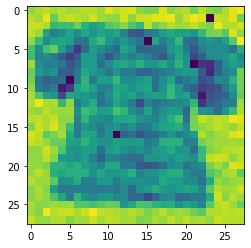

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Coat


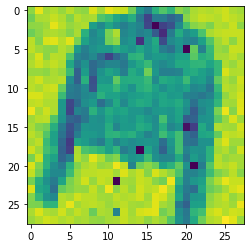

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Shirt


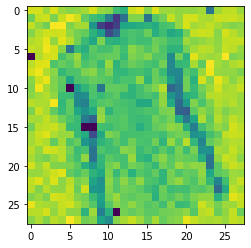

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Trouser


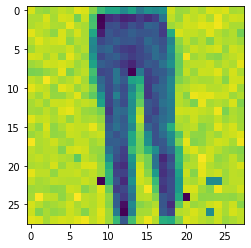

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Bag


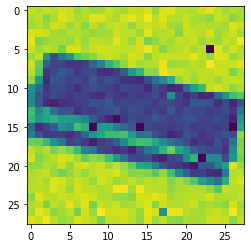

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Pullover


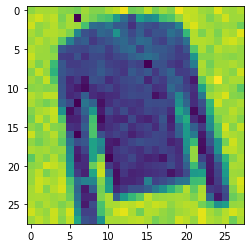

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Pullover


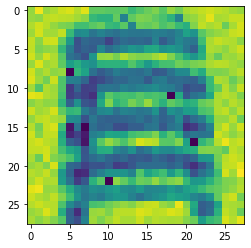

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Bag


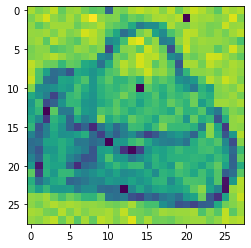

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Bag


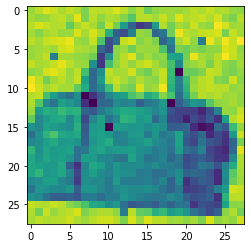

In [5]:
# display the first 9 image with its label
for i in range(0,9):
    print(train_labels[i+1])
    print(mapping[str(train_labels_with_id[i+1][1])])
    show_image(train_images[i])
    # 0 is the index of the training image you want to display

In [6]:
# normalize the data
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images/255.0
test_images = test_images/255.0
# print(train_images[0])

In [7]:
# def define_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=((50000, 28, 28))))
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Dropout(0.2))
# 	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Dropout(0.2))
# 	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Dropout(0.2))
# 	model.add(Flatten())
# 	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dropout(0.2))
# 	model.add(Dense(10, activation='softmax'))
# 	# compile model
# 	opt = SGD(lr=0.001, momentum=0.9)
# 	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# 	return model

In [8]:

# model = Sequential()
# model.add(Conv2D(16,(5,5),padding='valid',input_shape = train_images.shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
# model.add(Dropout(0.4))
# model.add(Conv2D(32,(5,5),padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
# model.add(Dropout(0.6))
# model.add(Conv2D(64,(5,5),padding='valid'))
# model.add(Activation('relu'))
# model.add(Dropout(0.8))
# model.add(Flatten())
# model.add(Dense(2))
# model.add(Activation('softmax'))

# batch_size = 100
# epochs= 100

# optimizer = keras.optimizers.rmsprop(lr = 0.0001, decay = 1e-6)

# model.compile(loss = 'binary_crossentropy',optimizer = optimizer, metrics = ['accuracy',keras_metrics.precision(), keras_metrics.recall()])

# history = model.fit(train_images,train_labels,steps_per_epoch = int(len(train_images)/batch_size),epochs=epochs)
# history

In [9]:
# model = Sequential()
# model.add(Conv2D(16,(5,5),padding='valid',input_shape =,data_format='channels_first'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
# model.add(Dropout(0.4))
# model.add(Conv2D(32,(5,5),padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
# model.add(Dropout(0.6))
# model.add(Conv2D(64,(5,5),padding='valid'))
# model.add(Activation('relu'))
# model.add(Dropout(0.8))
# model.add(Flatten())
# model.add(Dense(2))
# model.add(Activation('softmax'))

# batch_size = 100
# epochs= 100

# optimizer = keras.optimizers.rmsprop(lr = 0.0001, decay = 1e-6)

# model.compile(loss = 'binary_crossentropy',optimizer = optimizer, metrics = ['accuracy',keras_metrics.precision(), keras_metrics.recall()])

# history = model.fit(train_images,train_labels,steps_per_epoch = int(len(train_images)/batch_size),epochs=epochs)
# history

In [10]:
# model = Sequential([
#     Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(28,28,1)),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Conv2D(16, kernel_size=(5, 5), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Flatten(),
#     Dense(120, activation='relu'),
#     Dense(84, activation='relu'),
#     Dense(10, activation='softmax')
# ])


# model = Sequential([
#     Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Conv2D(128, kernel_size=(3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(28,28,1)),
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [11]:
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adam)
model.fit(train_images, train_labels,batch_size=256,epochs=15,verbose=2)
score, acc = model.evaluate(train_images, train_labels, verbose=0)
print('Val accuracy:', acc)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2021-11-26 23:37:27.080782: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
196/196 - 16s - loss: 0.8793 - accuracy: 0.6749
Epoch 2/15
196/196 - 14s - loss: 0.5490 - accuracy: 0.7968
Epoch 3/15
196/196 - 14s - loss: 0.4741 - accuracy: 0.8264
Epoch 4/15
196/196 - 15s - loss: 0.4329 - accuracy: 0.8411
Epoch 5/15
196/196 - 14s - loss: 0.4001 - accuracy: 0.8514
Epoch 6/15
196/196 - 15s - loss: 0.3747 - accuracy: 0.8620
Epoch 7/15
196/196 - 14s - loss: 0.3509 - accuracy: 0.8720
Epoch 8/15
196/196 - 15s - loss: 0.3327 - accuracy: 0.8768
Epoch 9/15
196/196 - 14s - loss: 0.3171 - accuracy: 0.8824
Epoch 10/15
196/196 - 15s - loss: 0.3061 - accuracy: 0.8863
Epoch 11/15
196/196 - 14s - loss: 0.2882 - accuracy: 0.8937
Epoch 12/15
196/196 - 14s - loss: 0.2750 - accuracy: 0.8970
Epoch 13/15
196/196 - 15s - loss: 0.2565 - accuracy: 0.9054
Epoch 14/15
196/196 - 14s - loss: 0.2411 - accuracy: 0.9093
Epoch 15/15
196/196 - 15s - loss: 0.2297 - accuracy: 0.9144
Val accuracy: 0.9139400124549866


In [12]:
test_results = model.predict(test_images)

In [13]:
test_results = np.round(test_results).astype(int)
test_labels = np.argmax(test_results,axis=1)
print(test_labels.shape)
print(test_labels[0])
new_test_label = []
just_labels = []
for i in range(len(test_labels)):
    new_test_label.append([i, test_labels[i]])
    just_labels.append(i)


(20000,)
9


In [14]:
my_submission = pd.DataFrame({'Id': just_labels, "label": test_labels})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)